In [60]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
from scipy.optimize import minimize
%matplotlib inline
from scipy.integrate import odeint, solve_ivp
import pandas as pd
import numpy as np

N_pop=331002647

C=pd.read_excel(r".\contact\usaM.xlsx")
D=C.to_numpy()
C=pd.read_excel(r".\contact\agdist.xlsx")
N=C.to_numpy()
N_total=N_pop*N


gamma=1.
epsilon=0.1
k=len(N)
v=0.01
i0=np.zeros((k,1))+0.0001
v0=np.zeros((k,1))+0.1
nt=600
t = np.linspace(0, 50, nt)



def deriv(y, t,  beta, gamma,epsilon,D):
    S=np.array(y[0:k]).reshape(k,1)
    V=np.array(y[k:2*k]).reshape(k,1)
    I=np.array(y[2*k:3*k]).reshape(k,1)
    dSdt = -beta*S* D.dot(I) 
    dVdt = -epsilon*V*beta*D.dot(I)
    dIdt = beta*(S+epsilon*V)*D.dot(I) - gamma * I
    x=np.vstack((dSdt,dVdt,dIdt))
    x=[item for sublist in x for item in sublist]
    return x
def func(v,beta, gamma,epsilon,D):
    v0=np.array(v).reshape(k,1)
    s0=N-i0-v0
    y0 =np.vstack((s0,v0,i0))
    y0 = [item for sublist in y0 for item in sublist]
    ret = odeint(deriv, y0, t, args=( beta, gamma,epsilon,D))
    Imax=max((sum(ret.T[2*k:3*k,:])).reshape(nt,1))
    #print(Imax)
    return Imax
    
       

def constraint1(x):
    return sum(x)-v
bnds=[]
for i in range(k):
   bnds.append(tuple([0,N[i]-i0[i]]))

bnds
#bnds=(b,b,b,b,b,b,b,b,b)
con1={'type':'eq','fun':constraint1}
cons=[con1]

x=[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
B=[]
for beta in range(len(x)):
    sol=minimize(func,v0,args=(beta,gamma,epsilon,D),method='SLSQP',bounds=bnds,constraints=cons)
    B.append(sol.x)
    print(beta)
    








0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


[0.03971927]


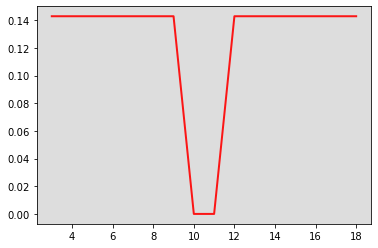

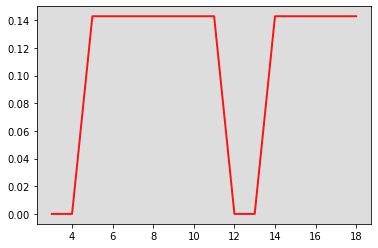

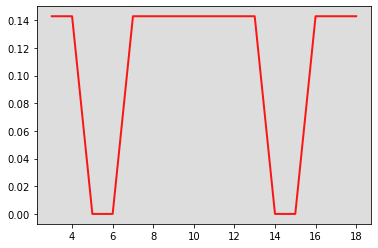

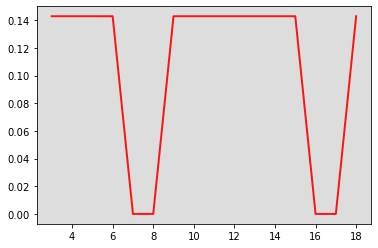

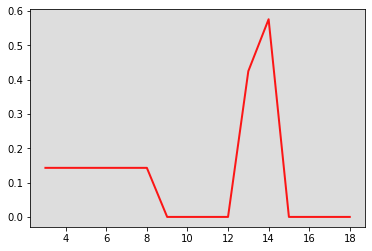

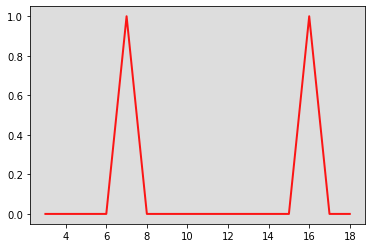

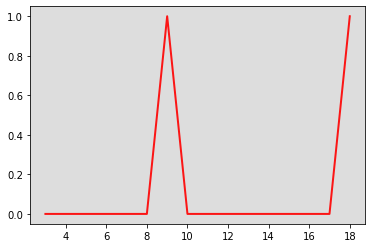

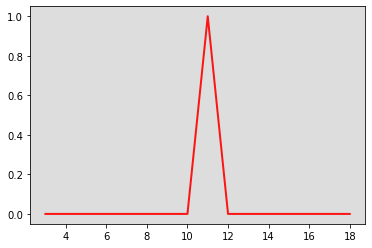

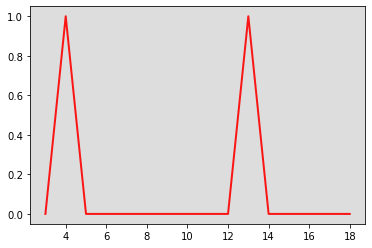

In [65]:
print(min(N))
A=np.array(B).reshape(k,len(x))/v
for j in range(k):
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
    ax.plot(x, A[j,:], 'r', alpha=0.9, lw=2, label='Infected')
 

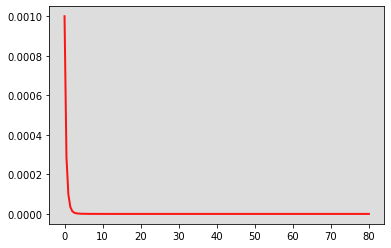

In [32]:
#v0=sol.x.reshape(k,1)
v0 = np.random.uniform(low=0, high=1, size=(k,1))
s0=N-i0-v0
y0 =np.vstack((s0,v0,i0))
y0 = [item for sublist in y0 for item in sublist]
ret = odeint(deriv, y0, t, args=( beta, gamma,epsilon,D))
#I_t=(sum(ret.T[2*k:3*k,:])).reshape(160,1)
I_t=ret.T[2*k,:]

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, I_t, 'r', alpha=0.9, lw=2, label='Infected')
      



In [8]:
x={'a':10}
x+x


TypeError: unsupported operand type(s) for +: 'dict' and 'dict'